# 1. Import Necessary libraries

In [2]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [3]:
cancer_data = load_breast_cancer()

In [4]:
cancer_data_df = pd.DataFrame(cancer_data.data,columns = cancer_data.feature_names)
cancer_data_df['target'] = cancer_data.target
cancer_data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# 3. Data Preparation

In [5]:
cancer_data_df.shape

(569, 31)

In [6]:
cancer_data_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
cancer_data_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# 4. Model building

# BEFORE PCA

In [8]:
X = cancer_data_df.drop('target',axis = 1)
y = cancer_data_df[['target']]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [10]:
X_train.shape,y_train.shape

((455, 30), (455, 1))

In [11]:
X_test.shape,y_test.shape

((114, 30), (114, 1))

# 5. Model Training

In [17]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# 6. Model Testing || 7. Model Evaluation

## Train data

In [18]:
y_pred_train = dt_model.predict(X_train)

In [23]:
print('Accuracy Score:',accuracy_score(y_train,y_pred_train))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy Score: 0.9846153846153847
Confusion Matrix:
 [[168   2]
 [  5 280]]


## Test Data

In [20]:
y_pred_test = dt_model.predict(X_test)

In [21]:
print('Accuracy Score:',accuracy_score(y_pred_test,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_pred_test,y_test))

Accuracy Score: 0.9035087719298246
Confusion Matrix:
 [[38  7]
 [ 4 65]]


## =======================================================================

# AFTER APPLYING PCA

# 4. Model Building

In [24]:
from sklearn.decomposition import PCA

In [27]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns = X.columns)
scaled_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [82]:
scaled_X.corr().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


In [79]:
pca = PCA(n_components=1)
pca_components = pca.fit_transform(scaled_X).round(2) #30features
pca_X = pd.DataFrame(pca_components,columns = ['PC1'])#,'PC2']) #2features
pca_X

,PC1
0,9.19
1,2.39
2,5.73
3,7.12
4,3.94
...,...
564,6.44
565,3.79
566,1.26
567,10.37


In [77]:
pca.explained_variance_ratio_

array([0.44272026])

In [66]:
import numpy as np
np.cumsum(np.round(pca.explained_variance_ratio_,2) * 100)

array([44., 63.])

In [33]:
X_train,X_test,y_train,y_test = train_test_split(pca_X,y,test_size=0.20,random_state=12,stratify=y)

In [34]:
X_train.shape,y_train.shape

((455, 2), (455, 1))

In [35]:
X_test.shape,y_test.shape

((114, 2), (114, 1))

# 5. Model Training

In [36]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# 6. Model Testing || 7. Model Evaluation

## Train data

In [37]:
y_pred_train = dt_model.predict(X_train)

In [38]:
print('Accuracy Score:',accuracy_score(y_train,y_pred_train))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy Score: 0.9626373626373627
Confusion Matrix:
 [[160  10]
 [  7 278]]


## Test Data

In [39]:
y_pred_test = dt_model.predict(X_test)

In [40]:
print('Accuracy Score:',accuracy_score(y_pred_test,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_pred_test,y_test))

Accuracy Score: 0.9385964912280702
Confusion Matrix:
 [[39  4]
 [ 3 68]]


## PCA for visualization

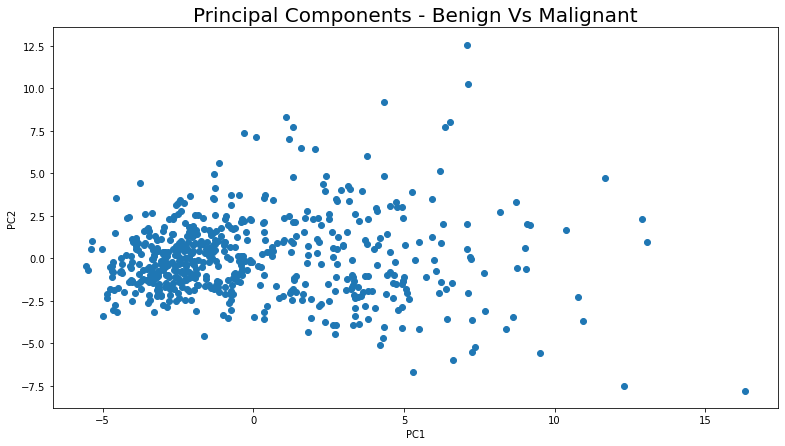

In [74]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13,7))
plt.scatter(x = 'PC1',y = 'PC2',data = pca_X)#,c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components - Benign Vs Malignant',size = 20)
plt.show()

# THE END!!!

## =======================================================================